# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Описание проекта:

Заказчик этого исследования — сеть отелей «Как в гостях». 

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

# Описание данных:

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:
- id — номер записи;
- adults — количество взрослых постояльцев;
- arrival_date_year — год заезда;
- arrival_date_month — месяц заезда;
- arrival_date_week_number — неделя заезда;
- arrival_date_day_of_month — день заезда;
- babies — количество младенцев;
- booking_changes — количество изменений параметров заказа;
- children — количество детей от 3 до 14 лет;
- country — гражданство постояльца;
- customer_type — тип заказчика:
 - Contract — договор с юридическим лицом;
 - Group — групповой заезд;
 - Transient — не связано с договором или групповым заездом;
 - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- days_in_waiting_list — сколько дней заказ ожидал подтверждения;
- distribution_channel — канал дистрибуции заказа;
- is_canceled — отмена заказа;
- is_repeated_guest — признак того, что гость бронирует номер второй раз;
- lead_time — количество дней между датой бронирования и датой прибытия;
- meal — опции заказа:
 * SC — нет дополнительных опций;
 * BB — включён завтрак;
 * HB — включён завтрак и обед;
 * FB — включён завтрак, обед и ужин.
- previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
- previous_cancellations — количество отменённых заказов у клиента;
- required_car_parking_spaces — необходимость места для автомобиля;
- reserved_room_type — тип забронированной комнаты;
- stays_in_weekend_nights — количество ночей в выходные дни;
- stays_in_week_nights — количество ночей в будние дни;
- total_nights — общее количество ночей;
- total_of_special_requests — количество специальных отметок.

### Шаг 1. Откройте файлы с данными

In [1]:
#pip install pandas-profiling

In [2]:
#pip install --upgrade Pillow

In [3]:
#from ydata_profiling import ProfileReport

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import math
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

In [5]:
train = pd.read_csv('/Users/artemmm/Downloads/hotel_test.csv')
test = pd.read_csv('/Users/artemmm/Downloads/hotel_test.csv')

In [6]:
train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


In [7]:
test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


Файлы открылись адекватно, следующим действием производим предобработку и исследовательский анализ.

### Шаг 2. Предобработка и исследовательский анализ данных

***Пропуски***

In [8]:
print(train.isna().sum().sum())

0


пропусков нет ни в одном из датасетов - это хорошо

In [9]:
for column in train.select_dtypes(include=['object']).columns:
    train[column] = train[column].str.replace(' ', '')
    
for column in test.select_dtypes(include=['object']).columns:
    test[column] = test[column].str.replace(' ', '')

for column in train.select_dtypes(include=['object']).columns:
    train[column] = train[column].str.lower()
    
for column in test.select_dtypes(include=['object']).columns:
    test[column] = test[column].str.lower()

если в пропусках были пробелы - мы их удаляем. В проектах часто такое встречается, лучше сразу удалить, ведь лишний пробел - лишний столбец, лишняя информация для модели.

***Дубликаты***

In [10]:
print(train.duplicated().sum())

0


Дубликатов нет, пока что данные выглядят чистыми.

***Типы столбцов***

In [11]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)
train = train.astype({ 'lead_time':'int64', 'adults':'int64', 'children':'int64', 
                      'babies':'int64'})
test = test.astype({'is_canceled':'int64', 'lead_time':'int64', 'adults':'int64', 'children':'int64', 
                      'babies':'int64'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     32412 non-null  int64 
 1   lead_time                       32412 non-null  int64 
 2   arrival_date_year               32412 non-null  int64 
 3   arrival_date_month              32412 non-null  object
 4   arrival_date_week_number        32412 non-null  int64 
 5   arrival_date_day_of_month       32412 non-null  int64 
 6   stays_in_weekend_nights         32412 non-null  int64 
 7   stays_in_week_nights            32412 non-null  int64 
 8   adults                          32412 non-null  int64 
 9   children                        32412 non-null  int64 
 10  babies                          32412 non-null  int64 
 11  meal                            32412 non-null  object
 12  country                         32412 non-null

- is_canceled с типа int64 поменял на boolean (целевой столбец true or false)
- lean_time с типа float64 поменял на int64 (количество дней)
- adults, children, babies с float64 на int64 (количество взрослых)
- Все пробелы в столбцах с типом object были убраны, текст приведен к нижнему регистру.
- Столбец 'required_car_parking_spaces' выглядит странно. Как написано в условии, он означает: "необходимость места для автомобиля". Но не количество мест для автомобиля. Не уверен как нужно это расценивать, но, по условию, к нам может приехать группа людей, и им, вполне возможно, нужно более 1 места для парковки машин.

***Обработка выбросов***

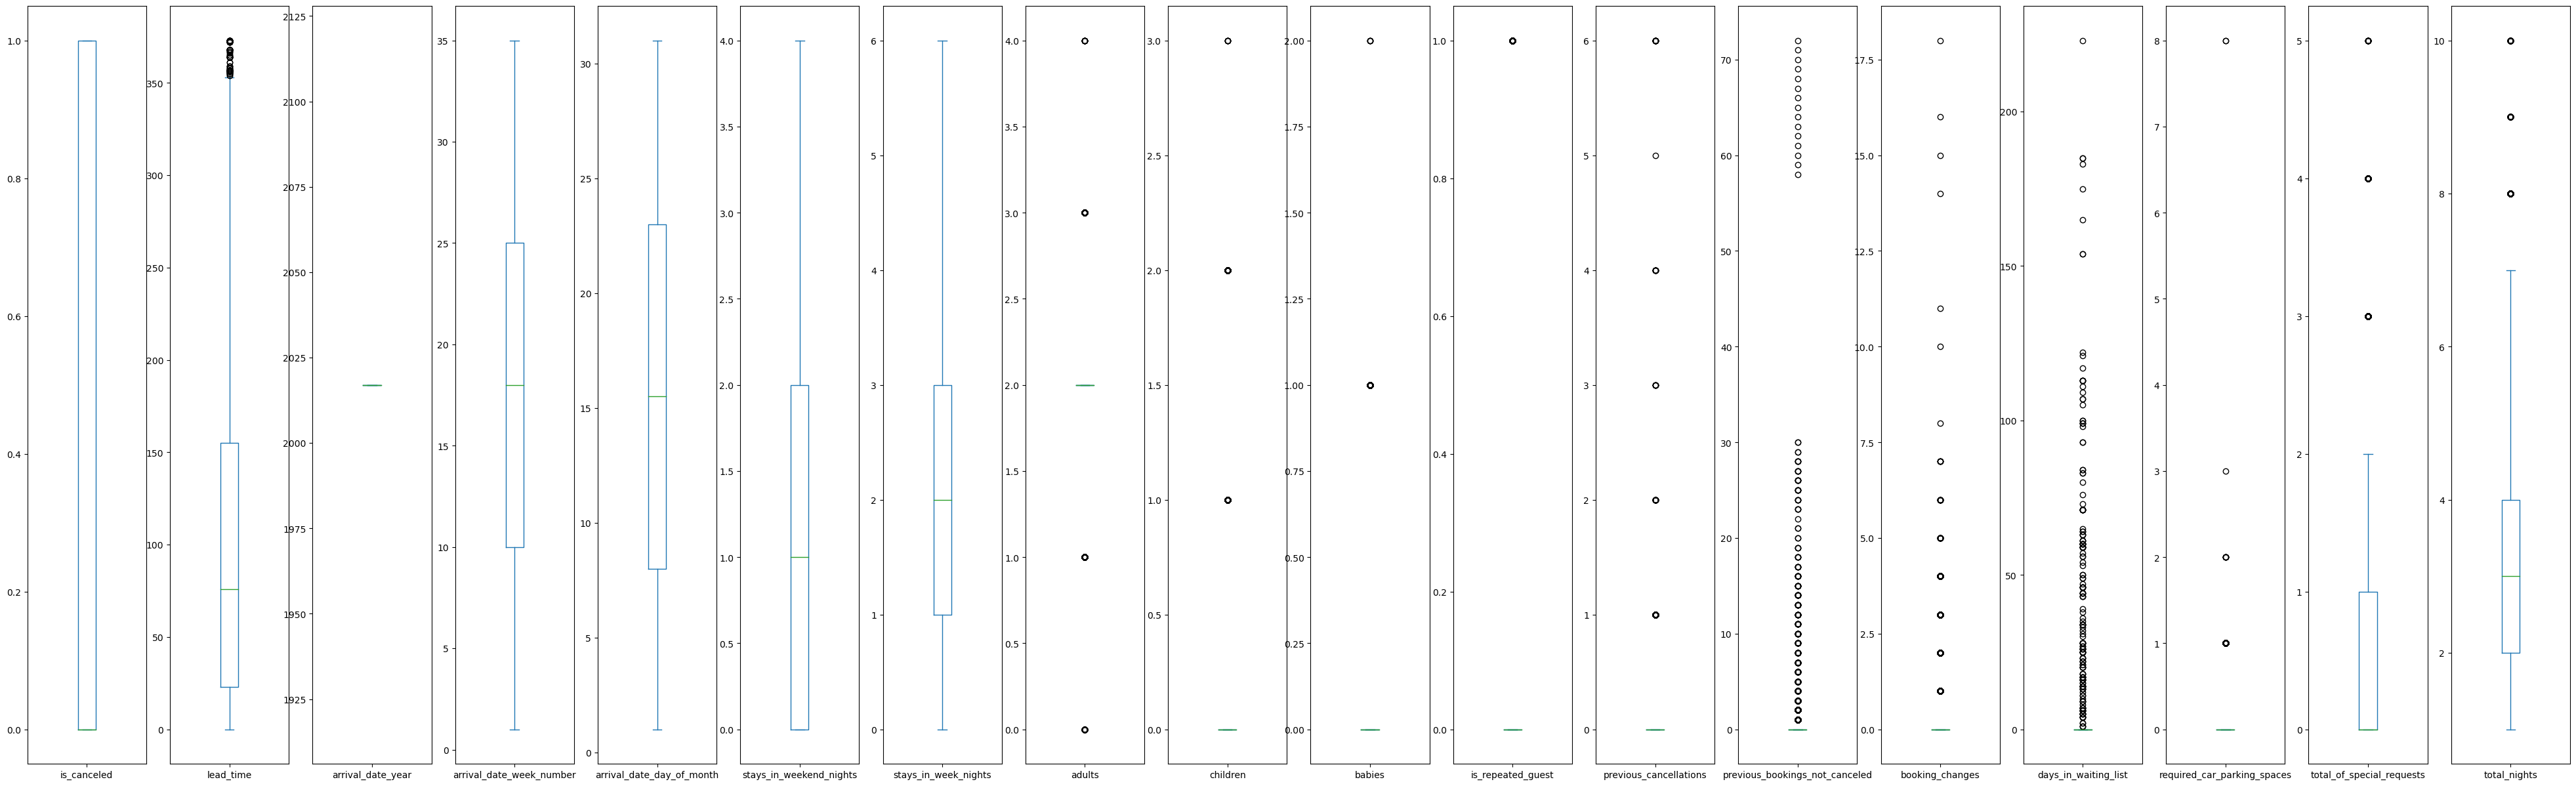

In [12]:
train.plot(kind = 'box', subplots = True, figsize = (50,15));
plt.show()

Видим значительное кол-во выбросов. Нужно отчистить их, чтобы делать анализ данных, и чтобы модель адекватно обучалась.

Так как выбросов очень много, мне необходимо вырезать самостоятельно часть данных (не более 10%)

In [13]:
train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


In [14]:
print(train.shape[0])
train = train[(train['adults'] < 3)]
train = train[(train['children'] < 3)]
train = train[(train['children'] < 3)]
train = train[(train['days_in_waiting_list'] < 30)]
train = train[(train['previous_bookings_not_canceled'] < 16)]
train = train[(train['previous_cancellations'] < 3)]
print(train.shape[0])

32412
30407


6000 удалено в ходе борьбы с выбросами. Больше удалять не стоит, 10% - оптимальный объем. В ходе удаления приоритетными были строки, в которых аномально большие значения, по сравнению с 75 квантилем и средним значением. 

Природа появления таких значений может быть разная. В столбце 'days_in_waiting_list' максимальное значение 256 дней. Возможно, человек за год забронировал номер за год до поездки и система не требовала от него так рано подтверждать бронь. 

'previous_bookings_not_canceled' - 58 максимальное значение. Возможно это какой-то организатор туров, возможно - великий путешественник, а быть может, сбой в системе. Нам остается только догадываться. 58 броней за все время - вполне реально.

***Мультиколлинеарность***

In [15]:
train.select_dtypes(include = 'number').corr() > 0.5

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
is_canceled,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
lead_time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_year,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_week_number,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
arrival_date_day_of_month,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
stays_in_weekend_nights,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
stays_in_week_nights,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
adults,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
children,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
babies,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


Заметной корреляции между признаками не видно. Понятно, что общее кол-во ночей коррелирует с кол-вом ночей в выходные дни и будние дни, как и кол-во дней, каких-то иных прямых зависимостей не видно.

***Profiling***

In [16]:
#PReport = train
#ProfileReport(PReport)

Вывод: профайлинг показал кучу ошибок, из них:
- дубликаты (около 18к строк являются дубликатами). Их происхождение неизвестно. Удалить их - значит удалить 20% данных. Если модель будет обучаться плохо, как вариант - отчистить эти данные. Но пока оставим все как есть.
- высокие корреляции. Проанализировав корреляции делаю вывод: все корреляции завязаны на схожих по признакам столбцам (общее количество ночей и количество ночей по будням и тд.). Эту корреляцию необходимо будет устранить перед подбором моделей и обучением, но сейчас я не буду удалять столбцы, так как, возможно, нужно будет еще проанализировать данные.
- нулевые значения. Все нулевые значения реальны, допустим столбец "дней в ожидании подтверждения" имеет много 0 значений. Значит, при бронировании сразу подтверждали эту бронь.
- несбалансированные значения. В нашем случае в указанных столбцах это не проблема.

***Исследовательский анализ данных***

Для начала посмотрим, сколько в среднем человек отказывается от брони.

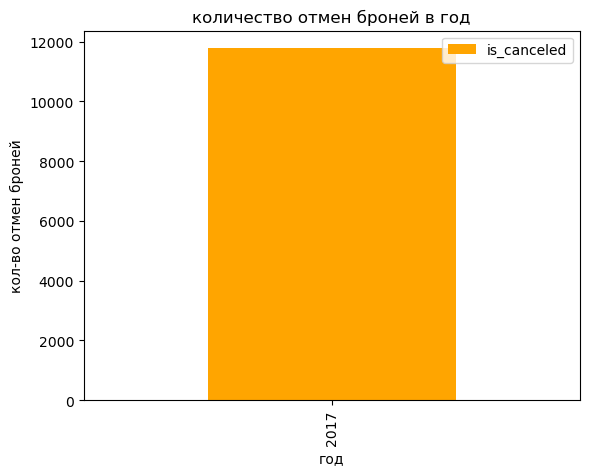

In [17]:
train.pivot_table(values = 'is_canceled', index = 'arrival_date_year', 
                  aggfunc = 'sum').plot(kind = 'bar', color = '#FFA500', 
                                        xlabel = 'год', ylabel = 'кол-во отмен броней',
                                        title = 'количество отмен броней в год')
plt.show()

Так как данных мало, то увеличение за год отмен на 100% неприятный знак. 14000 отмен за год это значимый убыток. Проблема серьезная.

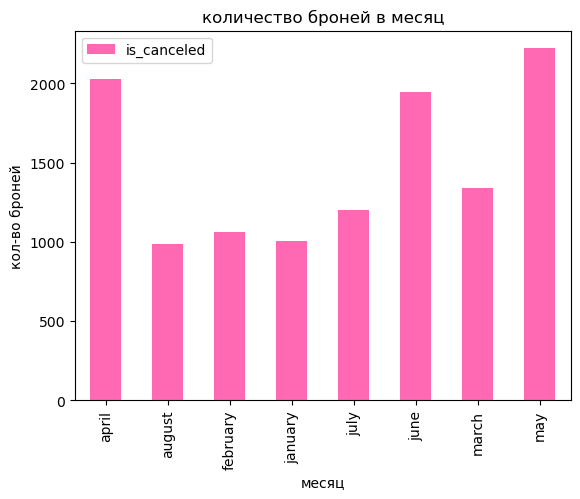

In [18]:
train.pivot_table(values = 'is_canceled', index = 'arrival_date_month', 
                  aggfunc = 'sum').plot(kind = 'bar', color = '#FF69B4', xlabel = 'месяц', 
                                        ylabel = 'кол-во броней', title = 'количество броней в месяц')
plt.show()

самые загруженные месяцы - октябрь и сентябрь. В январе поток самый маленький.

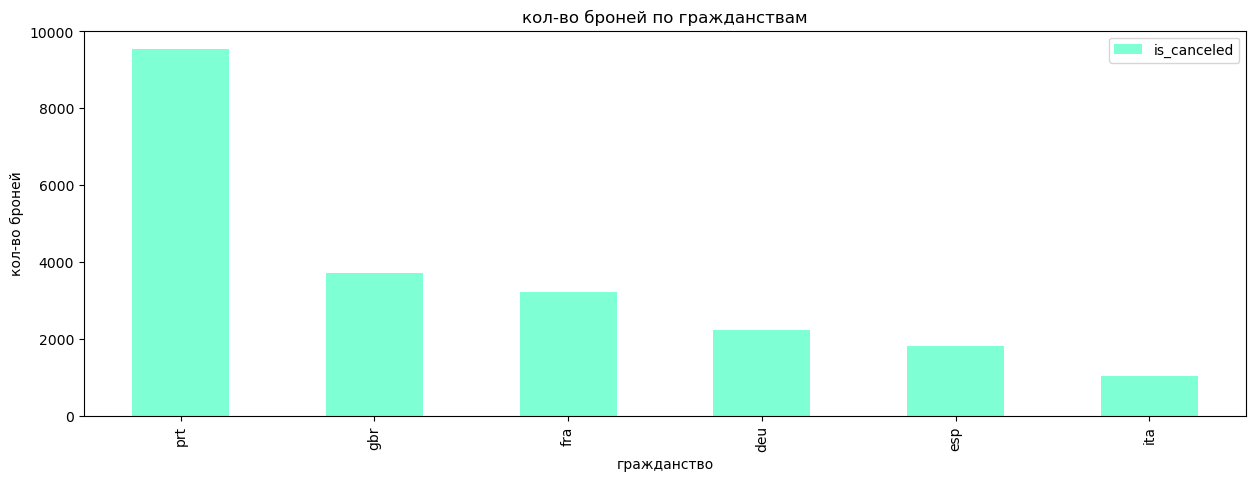

In [19]:
pt_country = train.pivot_table(values = 'is_canceled', index = 'country',
                               aggfunc = 'count').sort_values(by = 'is_canceled', ascending = False)
pt_country = pt_country[pt_country['is_canceled'] > 1000]
pt_country.plot(kind = 'bar', color = '#7FFFD4', xlabel = 'гражданство', ylabel = 'кол-во броней', 
                title = 'кол-во броней по гражданствам', figsize = (15,5))
plt.show()

Большую часть составляют 'PRT' - видимо это сокращение от 'portuguese' (Португалия). Причем это гражданство составляет примерно 50% всех клиентов сети отелей. Можно предположить, что основные точки сети находятся именно в Португалии. Из предыдущих графиков видно, что на летний период приходится меньшая часть посетителей. Возможно, это потому, что основные точки отеля находится вдали от моря. 

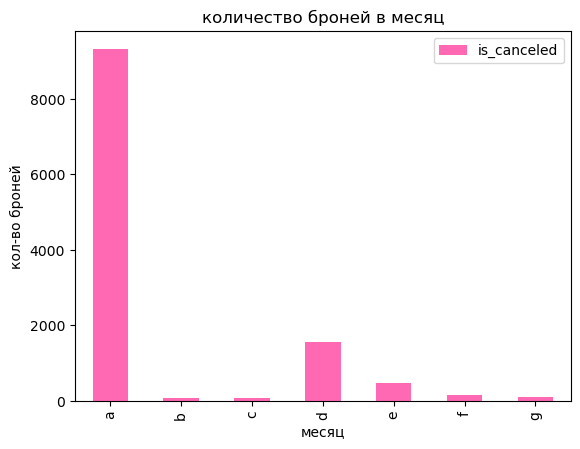

In [20]:
train.pivot_table(values = 'is_canceled', index = 'reserved_room_type', 
                  aggfunc = 'sum').plot(kind = 'bar', color = '#FF69B4', xlabel = 'месяц', 
                                        ylabel = 'кол-во броней', title = 'количество броней в месяц')
plt.show()

клиенты в основном предпочитают самый дорогой номер - класса ***a***. Он самый частовстречаемый и от него чаще всего отказываются.

***Подготовка данных к ML***

In [21]:
train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,1,74,2017,january,1,1,1,0,2,0,...,0,0,0,a,0,0,transient,0,0,1
1,1,62,2017,january,1,1,2,2,2,0,...,0,0,0,a,0,0,transient,0,1,4
2,1,62,2017,january,1,1,2,2,2,0,...,0,0,0,a,0,0,transient,0,1,4
3,1,71,2017,january,1,1,2,2,1,0,...,0,0,0,a,0,0,transient,0,1,4
4,1,172,2017,january,1,1,2,5,2,0,...,0,0,0,a,0,0,transient,0,0,7


Для начала нужно удалить столбцы с высоким коэфф.корреляции и столбцы которые не дают нужной информации модели.

In [22]:
data_train = train.drop(['required_car_parking_spaces', 'stays_in_week_nights', 'stays_in_weekend_nights', 
                    'arrival_date_week_number', 'is_repeated_guest', 'arrival_date_year', 
                    'arrival_date_month', 'arrival_date_day_of_month'], axis = 1)

data_test = test.drop(['required_car_parking_spaces', 'stays_in_week_nights', 'stays_in_weekend_nights', 
                    'arrival_date_week_number', 'is_repeated_guest', 'arrival_date_year', 
                    'arrival_date_month', 'arrival_date_day_of_month'], axis = 1)
data_train['country'].value_counts().head(15)
data_train = data_train.reset_index()
for i in range(data_train.shape[0]):
    if data_train.loc[i, 'country'] not in ['prt', 'fra', 'gbr', 'esp', 'deu','ita','irl','bel','nld','bra',
                                            'usa','che','aut','swe', 'pol']:
        data_train.loc[i, 'country'] = 'other'
        
for i in range(data_test.shape[0]):
    if data_test.loc[i, 'country'] not in ['prt', 'fra', 'gbr', 'esp', 'deu','ita','irl','bel','nld','bra',
                                            'usa','che','aut','swe', 'pol']:
        data_test.loc[i, 'country'] = 'other'

Так как цель нашей модели - предсказать откажется ли клиент от брони или нет, то есть множество признаков, над которыми нужно подумать. Я решил, что кол-во парковочных мест вряд ли сильно связано с отказом от брони, а для модели это лишняя информация, поэтому решил удалить. Коррелирующие столбцы - "кол-во ночей в будни" и "кол-во ночей по выходным" я удалил потому, что они имеют большой коэфф. корреляции, эти два столбца вполне спокойно может заменить столбец "общее кол-во ночей". "is_repeated_guest" я удалил, так как у нас есть два других столбца "кол-во отмененных заказов" и "кол-во неотмененных заказов", которые могут заместить этот столбец и не допустить корреляции. По поводу дат: в нашем проекте даты вряд-ли связанны с отказом клиента от брони, а обработать их и дать модели == потратить время. Если при обучении будет все плачевно, то как вариант - поработать с датами. 

Далее нужно кодировать столбцы, которые этого требуют, важно не попасть в дамми-ловушку, поэтому ставлю drop_first = True 

In [23]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
dummies_train = data_train.copy()
dummies_test = data_test.copy()
dummies_train = dummies_train.drop('index', axis = 1)
ohe_features_ridge = dummies_train.select_dtypes(include='object').columns.to_list()
encoder.fit(dummies_train[ohe_features_ridge])
dummies_train[encoder.get_feature_names_out()] = encoder.transform(dummies_train[ohe_features_ridge])
dummies_test[encoder.get_feature_names_out()] = encoder.transform(dummies_test[ohe_features_ridge])
dummies_train = dummies_train.drop(ohe_features_ridge, axis=1)
dummies_test = dummies_test.drop(ohe_features_ridge, axis=1)
dummies_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30407 entries, 0 to 30406
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     30407 non-null  int64  
 1   lead_time                       30407 non-null  int64  
 2   adults                          30407 non-null  int64  
 3   children                        30407 non-null  int64  
 4   babies                          30407 non-null  int64  
 5   previous_cancellations          30407 non-null  int64  
 6   previous_bookings_not_canceled  30407 non-null  int64  
 7   booking_changes                 30407 non-null  int64  
 8   days_in_waiting_list            30407 non-null  int64  
 9   total_of_special_requests       30407 non-null  int64  
 10  total_nights                    30407 non-null  int64  
 11  meal_fb                         30407 non-null  float64
 12  meal_hb                         

Датафреймы имеют разные размеры, тк в test меньше стран, чем в train. Приводим к единому размеру

Масштабируем данные

In [24]:
scaler = StandardScaler()
#numeric = ['lead_time', 'adults', 'children', 'babies', 'previous_cancellations',
#           'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 
#           'total_of_special_requests', 'total_nights']
numeric = dummies_train.select_dtypes(include = 'number').columns.to_list()
numeric.remove('is_canceled')
scaler.fit(dummies_train[numeric])
dummies_train[numeric] = scaler.transform(dummies_train[numeric])

numeric = dummies_test.select_dtypes(include = 'number').columns.to_list()
numeric.remove('is_canceled')
scaler.fit(dummies_test[numeric])
dummies_test[numeric] = scaler.transform(dummies_test[numeric])
dummies_test = dummies_test.reset_index()
dummies_train = dummies_train.reset_index()
#dummies_train = dummies_train.drop(['level_0'], axis = 1)  
dummies_train.head()

,index,is_canceled,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,distribution_channel_ta/to,reserved_room_type_b,reserved_room_type_c,reserved_room_type_d,reserved_room_type_e,reserved_room_type_f,reserved_room_type_g,customer_type_group,customer_type_transient,customer_type_transient-party
0,0,1,-0.258198,0.505461,-0.250588,-0.075058,-0.0706,-0.126593,-0.333936,-0.044877,...,0.449286,-0.079296,-0.078026,-0.433382,-0.221249,-0.127979,-0.090681,-0.072731,0.431239,-0.403585
1,1,1,-0.396889,0.505461,-0.250588,-0.075058,-0.0706,-0.126593,-0.333936,-0.044877,...,0.449286,-0.079296,-0.078026,-0.433382,-0.221249,-0.127979,-0.090681,-0.072731,0.431239,-0.403585
2,2,1,-0.396889,0.505461,-0.250588,-0.075058,-0.0706,-0.126593,-0.333936,-0.044877,...,0.449286,-0.079296,-0.078026,-0.433382,-0.221249,-0.127979,-0.090681,-0.072731,0.431239,-0.403585
3,3,1,-0.292871,-1.926814,-0.250588,-0.075058,-0.0706,-0.126593,-0.333936,-0.044877,...,0.449286,-0.079296,-0.078026,-0.433382,-0.221249,-0.127979,-0.090681,-0.072731,0.431239,-0.403585
4,4,1,0.874442,0.505461,-0.250588,-0.075058,-0.0706,-0.126593,-0.333936,-0.044877,...,0.449286,-0.079296,-0.078026,-0.433382,-0.221249,-0.127979,-0.090681,-0.072731,0.431239,-0.403585


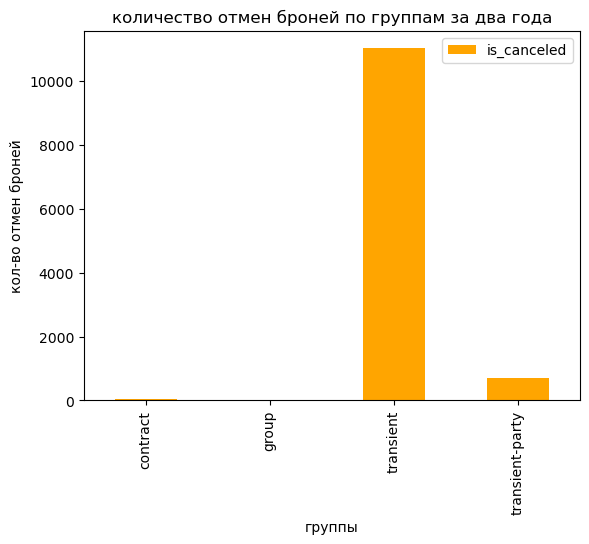

In [25]:
train.pivot_table(values = 'is_canceled', index ='customer_type', 
                  aggfunc = 'sum').plot(kind = 'bar', color = '#FFA500', 
                                        xlabel = 'группы', ylabel = 'кол-во отмен броней',
                                        title = 'количество отмен броней по группам за два года')
plt.show()

Group категория максимально надежная. 

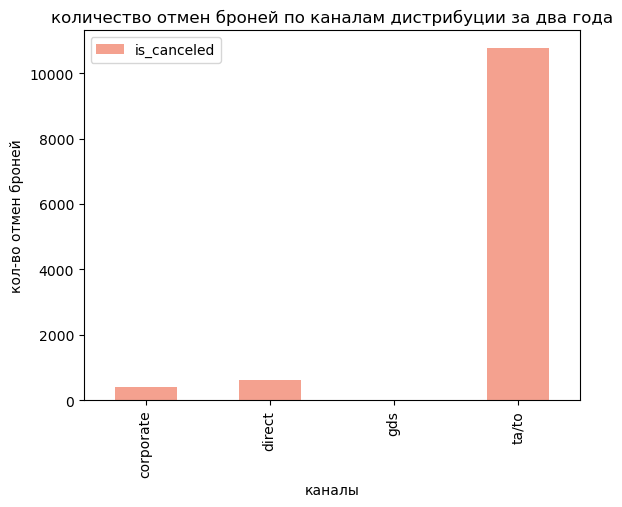

In [26]:
train.pivot_table(values = 'is_canceled', index ='distribution_channel', 
                  aggfunc = 'sum').plot(kind = 'bar', color = '#F4A18F', 
                                        xlabel = 'каналы', ylabel = 'кол-во отмен броней',
                                        title = 'количество отмен броней по каналам дистрибуции за два года')
plt.show()

самый надежный канал - gds.

***ВЫВОД ШАГА №2:***
- Пропуски: не найдено. Все пробелы в столбцах с типом object были убраны и текст был приведен к нижнему регистру.
- Выбросы: обработаны. Удалены самые большие значения в объеме 10% от общих данных.
- Типы столбцов: исправлены на необходимые.
- Коллинеарность: связи найдены и исправлены.
- Нулевые значения: значения в норме.
- Несбалансированность данных: проблемы нет.
- Даты: удалены столбцы с годом, месяцем, днём. В нашей ситуации даты не играют большой роли, поэтому можно принять решение удалить их, чтобы не создавать лишние трудности.
- Прямое кодирование: проведено.
- Масштабирование признаков: произведена стандартизация.

Датасет готов к обучению моделей.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

В этом шаге нужно оценить прибыль отеля без внедрения депозитов.

In [27]:
train = train.reset_index()
train.head()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,1,74,2017,january,1,1,1,0,2,...,0,0,0,a,0,0,transient,0,0,1
1,1,1,62,2017,january,1,1,2,2,2,...,0,0,0,a,0,0,transient,0,1,4
2,2,1,62,2017,january,1,1,2,2,2,...,0,0,0,a,0,0,transient,0,1,4
3,3,1,71,2017,january,1,1,2,2,1,...,0,0,0,a,0,0,transient,0,1,4
4,4,1,172,2017,january,1,1,2,5,2,...,0,0,0,a,0,0,transient,0,0,7


In [28]:
def profit(row):
    if row['arrival_date_month'] in ['september', 'october', 'november', 'may', 'march', 'april']:
        seasons_coeff = 1.20
    elif row['arrival_date_month'] in ['july','june', 'august']:
        seasons_coeff = 1.40
    elif row['arrival_date_month'] in ['january', 'february', 'december']:
        seasons_coeff = 1
    room_price = {'a':1000, 'b':800, 'c': 600, 'd':550, 'e':500, 'f':450, 'g':350}
    cost_once = {'a':400, 'b':350, 'c': 350, 'd': 150, 'e':150, 'f':150, 'g':150}
    price_per_night = room_price[row['reserved_room_type'].strip()] * seasons_coeff
    cost_per_night = cost_once[row['reserved_room_type'].strip()] 
    nights_all = int(row['stays_in_weekend_nights']) + int(row['stays_in_week_nights'])
    if nights_all >= 3:
        profit_all_nights = (nights_all*price_per_night)-((math.floor(1 + nights_all/2))*cost_per_night)
    else:
        profit_all_nights = (nights_all*price_per_night)-((math.floor(1 + nights_all/1))*cost_per_night)
    if row['is_canceled'] == 0:
        return profit_all_nights
    elif row['is_canceled'] == 1:
        return ((cost_per_night + price_per_night) * -1)
row1 = train.iloc[95, :]
row2 = train.iloc[4, :]
print('Прибыль обозначается как:', profit(row1))
print('Убыток как:', profit(row2))

Прибыль обозначается как: 200
Убыток как: -1400


Функция написана, теперь нужно сделать доп.колонку, которая будет считать прибыль и убыток, чтобы в итоге сделать сумму.

In [29]:
train['profit/loss'] = train.apply(profit, axis = 1)
train.head()

,index,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,profit/loss
0,0,1,74,2017,january,1,1,1,0,2,...,0,0,a,0,0,transient,0,0,1,-1400.0
1,1,1,62,2017,january,1,1,2,2,2,...,0,0,a,0,0,transient,0,1,4,-1400.0
2,2,1,62,2017,january,1,1,2,2,2,...,0,0,a,0,0,transient,0,1,4,-1400.0
3,3,1,71,2017,january,1,1,2,2,1,...,0,0,a,0,0,transient,0,1,4,-1400.0
4,4,1,172,2017,january,1,1,2,5,2,...,0,0,a,0,0,transient,0,0,7,-1400.0


***Прибыль***

Теперь считаем сумму по годам.

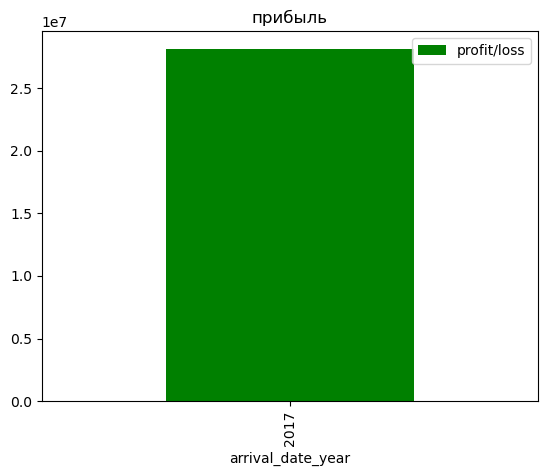

In [30]:
train.pivot_table(values = 'profit/loss', index = 'arrival_date_year',
                               aggfunc = 'sum').sort_values(by = 'profit/loss', ascending = False).plot(kind = 'bar',
                                        color = 'green', title = 'прибыль');

В 2016 было заработано 50_000_000 прибыли, а в 2015 около 20_000_000.

***Убытки***

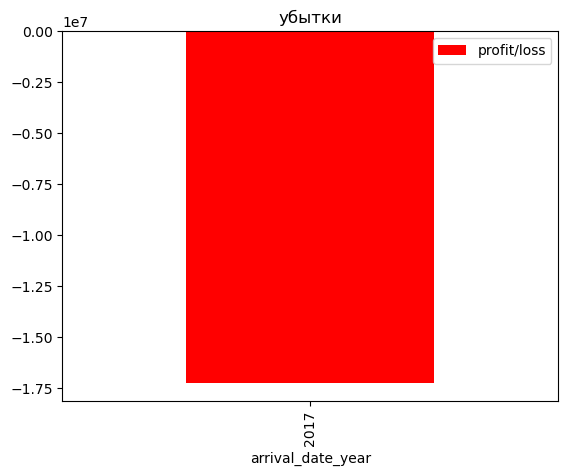

In [31]:
train_loss = train[train['profit/loss'] < 0]
train_loss.pivot_table(values = 'profit/loss', index = 'arrival_date_year',
                               aggfunc = 'sum').sort_values(by = 'profit/loss', ascending = False).plot(kind = 'bar'
                                                                            , color = 'red', title = 'убытки');

убытки в 2016 выросли в 2 раза по сравнению с 2015 годом, тем самым они составили 2_000_000. Помимо роста прибыли в 2016 выросли и убытки, которые неохобходимо минимизировать для роста чистой прибыли.

***Объём***

<Axes: title={'center': 'объем'}, xlabel='arrival_date_year'>

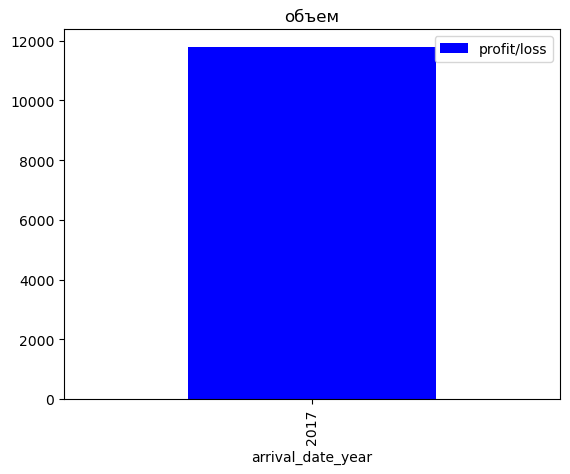

In [32]:
train_loss = train[train['profit/loss'] < 0]
train_loss.pivot_table(values = 'profit/loss', index = 'arrival_date_year',
                               aggfunc = 'count').sort_values(by = 'profit/loss', ascending = False).plot(
    kind = 'bar', color = 'blue', title = 'объем')

***Вывод:*** В этом шаге я составил функцию расчета прибыли без внедрения депозитов и посчитал прибыль и убытки за 2015 и 2016 год.

В 2016 в 2 раза вырос объем клиентов, больше чем в 2 раза выросла прибыль, убытки выросли в 2 раза. 
- прибыль: 50_000_000 - 2016; 20_000_000 - 2015
- убытки: 2_000_000 - 2016; 1_000_000 - 2015
- объемы: 14_000 - 2016, 7_000 - 2015

Думаю, что эти убытки можно сократить, если обучить модель заранее внести депозит для ненадежных клиентов. В следующем шаге я буду разрабатывать модели, которые помогут нам минимизировать убыток.

### Шаг 4. Разработка модели ML

В качестве главной метрики я буду использовать accuracy или же score - это одна и та же метрика. В нашей модели главное предсказать отказ как можно точнее, а метрика accuracy(от англ. точность) показывает процент попаданий. Поэтому подбор гиперпараметров и будет производиться по ней, ведь главное - попасть как можно точнее.

В прошлых шагах я уже подготовил датасет к обучению моделей.

В этом шаге я обучу модель методом кросс-валидации, сравню, выберу лучшую и проверю на итоговой - тестовой выборке.

In [33]:
train['is_canceled'].value_counts()

is_canceled
0    18628
1    11779
Name: count, dtype: int64

Наблюдается дисбаланс классов, будем использовать downsampling для борьбы с ним.

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [35]:
#dummies_train = dummies_train.drop('index', axis = 1)
#dummies_test = dummies_test.drop('index', axis = 1)

***RandomForestClassifier***

In [36]:
best_f1 = 0
best_acc = 0
best_est = 0
best_depth = 0
scores = []
features = dummies_train.drop('is_canceled', axis = 1)
target = train['is_canceled']
best_cvs = 0
for depth in [9,10,13,16]:
    for est in [40, 70,90]:
        model = RandomForestClassifier(max_depth = depth, n_estimators = est, class_weight = 'balanced')
        cvs = cross_val_score(model, features, target, cv = 5)
        if cvs.mean() > best_cvs:
            best_cvs = cvs.mean()
            best_depth = depth
            best_n_est = est
            best_model_rfc = model
print('Средний показатель на лучшей модели кросс-валидации:', best_cvs)
print('depth:', best_depth)
print('est:', best_est)

Средний показатель на лучшей модели кросс-валидации: 0.8477077701603817
depth: 9
est: 0


Код показал, что depth: 16  и est: 70 встречается чаще всего как лучшие гиперпараметры, будем использовать их. Средняя оценка данной модели на кросс-валидации: 0.84

***DecisionTreeClassifier***

In [37]:
best_acc = 0
best_est = 0
best_depth = 0
features = dummies_train.drop('is_canceled', axis = 1)
target = dummies_train['is_canceled']
best_cvs = 0
for crit in ['gini', 'entropy']:
    for depth in [1,2,3,4,5,6,7,8,9]:
        model = DecisionTreeClassifier(max_depth = depth, criterion = crit, class_weight = 'balanced')
        cvs = cross_val_score(model, features, target, cv = 5)
        if cvs.mean() > best_cvs:
            best_model_tree = model
            best_cvs = cvs.mean()
            best_depth = depth
            best_crit = crit
print('Средний показатель на кросс-валидации:', best_cvs)
print('лучший depth:', best_depth)
print('лучший crit:', best_crit)

Средний показатель на кросс-валидации: 0.77805723792054
лучший depth: 2
лучший crit: gini


лучший depth = 2, средний показатель хуже по сравнению с RFC.

***LogisticRegression***

In [38]:
best_acc = 0

features = dummies_train.drop('is_canceled', axis = 1)
target = dummies_train['is_canceled']

best_cvs = 0

for fit_i in [True, False]:
    for sol in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
        model_lr = LogisticRegression(solver = sol, fit_intercept = fit_i)
        cvs = cross_val_score(model_lr, features, target, cv = 5)
        if cvs.mean() > best_cvs:
                best_model_lr = model_lr
                best_cvs = cvs.mean()
                best_sol = sol
                best_fit = fit_i
print('solver:', best_sol)
print('fit_i:', best_fit)
print('Средний показатель на кросс-валидации:', best_cvs)

/Users/artemmm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/artemmm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/artemmm/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/artemmm/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/artemmm/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/artemmm/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/artemmm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/artemmm/

solver: lbfgs
fit_i: True
Средний показатель на кросс-валидации: 0.7980463999083728


/Users/artemmm/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


У логистической регрессии показатели хуже, чем у RFC.

Лучшая модель - RandomForestClassifier с показателями max_depth = 16, n_estimators = 90:
- score = 0.82
- accuracy = 0.83
- f1 = 0.82

Основная метрика - accuracy, ну или же score. По сути это одна и та же метрика, которая показывает одинаковые результаты

***Проверка на тестовой выборке***

In [39]:
#dummies_test = dummies_test.reset_index()
features_f = dummies_train.drop('is_canceled', axis = 1)
features = dummies_test.drop('is_canceled', axis = 1)
target = dummies_test['is_canceled']
best_model_rfc.fit(features_f, dummies_train['is_canceled'])
predictions = best_model_rfc.predict(features)
accuracy = accuracy_score(predictions, target)
score_rfr = best_model_rfc.score(features,target)

print('Accuracy на тестовой выборке:', accuracy)
print('Score на тестовой выборке:', score_rfr)

Accuracy на тестовой выборке: 0.9256756756756757
Score на тестовой выборке: 0.9256756756756757


***Прибыль за год с использованием депозитов***

Делать предсказания на train неправильно, так как это была обучающая выборка. Сравнивать необходимо с тестом.

In [40]:
test['profit/loss'] = test.apply(profit, axis = 1)
test['predictions'] = best_model_rfc.predict(features)

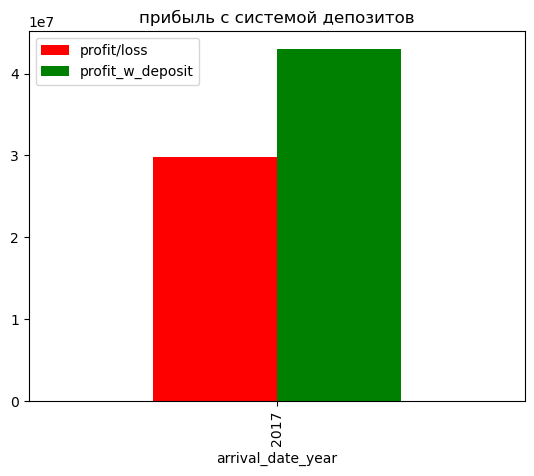

In [41]:
def profit_w_dep(row):
    if row['arrival_date_month'] in ['september', 'october', 'november', 'may', 'march', 'april']:
        seasons_coeff = 1.20
    elif row['arrival_date_month'] in ['july','june', 'august']:
        seasons_coeff = 1.40
    elif row['arrival_date_month'] in ['january', 'february', 'december']:
        seasons_coeff = 1
    room_price = {'a':1000, 'b':800, 'c': 600, 'd':550, 'e':500, 'f':450, 'g':350}
    cost_once = {'a':400, 'b':350, 'c': 350, 'd': 150, 'e':150, 'f':150, 'g':150}
    price_per_night = room_price[row['reserved_room_type'].strip()] * seasons_coeff
    cost_per_night = cost_once[row['reserved_room_type'].strip()]
    if (row['predictions'] == 0) & (row['is_canceled'] == 0): #предсказ: не отказ. реально: не отказ
        return row['profit/loss']
    elif (row['predictions'] == 1) & (row['is_canceled'] == 1): #предсказ: отказ. реально: отказ
        deposit = (price_per_night + cost_per_night) * 0.8
        return (cost_per_night + price_per_night) * -1 + deposit
    elif (row['predictions'] == 1) & (row['is_canceled'] == 0): #предсказ: отказ. реально: не отказ
        return row['profit/loss']
    elif (row['predictions'] == 0) & (row['is_canceled'] == 1): #предсказ: не отказ. реально: отказ
        return ((price_per_night + cost_per_night) * -1)
test['profit_w_deposit'] = test.apply(profit_w_dep, axis = 1)
test.pivot_table(values = ['profit_w_deposit', 'profit/loss'], index = 'arrival_date_year',
                               aggfunc = 'sum').sort_values(by = 'profit_w_deposit', ascending = False).plot(kind = 'bar',
                                        color = ['red', 'green'], title = 'прибыль с системой депозитов');

прибыль поднялась с ~30_000_000₽ до ~44_000_000₽. За счет минимизации убытков. Теперь посмотрим на изменение убытков.

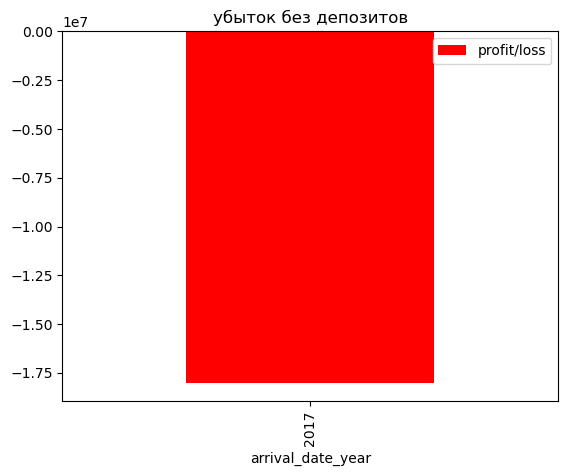

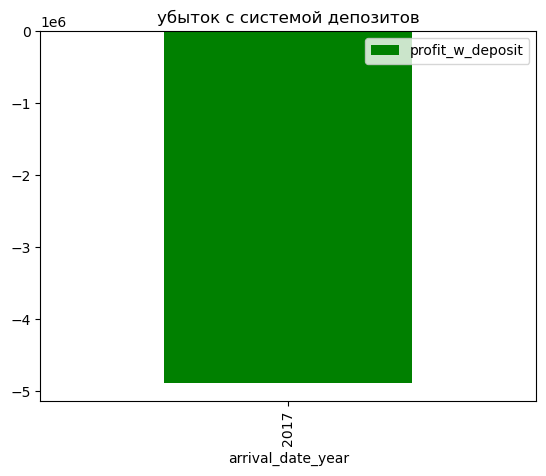

In [42]:
l_test_wo = test[test['profit/loss'] < 0]
l_test_w = test[test['profit_w_deposit'] < 0]
l_test_wo.pivot_table(values = 'profit/loss', index = 'arrival_date_year',
                               aggfunc = 'sum').sort_values(by = 'profit/loss', ascending = False).plot(kind = 'bar',
                                        color = 'red', title = 'убыток без депозитов');
plt.show()
l_test_wo.pivot_table(values = 'profit_w_deposit', index = 'arrival_date_year',
                               aggfunc = 'sum').sort_values(by = 'profit_w_deposit', ascending = False).plot(kind = 'bar',
                                        color = 'green', title = 'убыток с системой депозитов');
plt.show()

Видим, что убытки измеряются в разных величинах, в 1 случае в 1e7 (10 000 000), во 2 в 1e6 (1 000 000).

Убыток после внедрения депозитов упал с ~17_000_000 до ~4_900_000. Разница пошла в прибыль. 

***Окупаемость модели***

За тестовый период (2017) год внедрение депозитов минимизировало убыток на 8_000_000. На разработку системы прогнозирования заложен бюджет — 400_000. То есть, деньги потраченные на модель окупились в несколько раз.

***Вывод:***

В данном шаге с помощью кросс-валидации я обучил модель предсказывать отмену брони. Тестовая выборка показала точность 0.76.

Посчитал прибыль и убыток до и после внедрения депозитов за тестовый период. Расчеты показали, что после внедрения убыток уменьшился на 8_000_000.

Затраты на разработку системы прогнозирования - 400_000. Система окупила себя в несколько раз.

### Шаг 5. Опишите портрет «ненадёжного» клиента

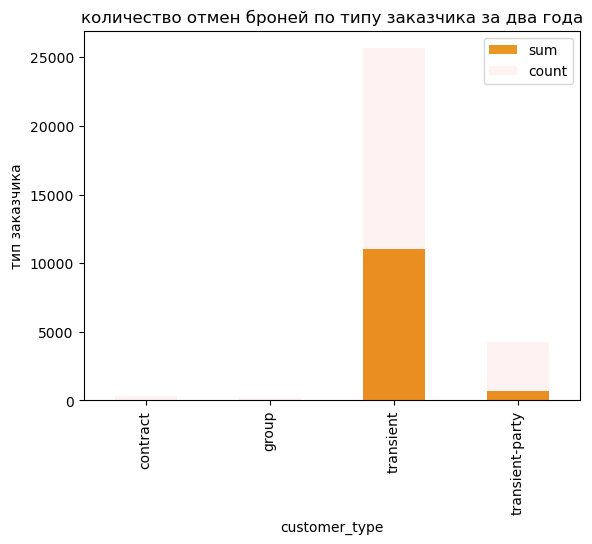

---------------------------------------------------------------


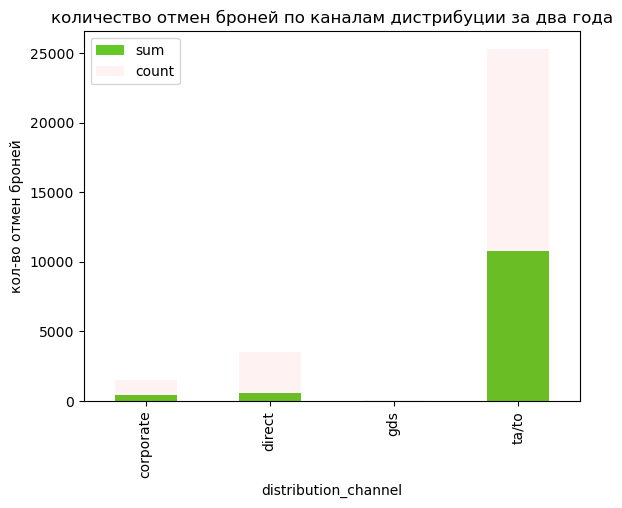

---------------------------------------------------------------


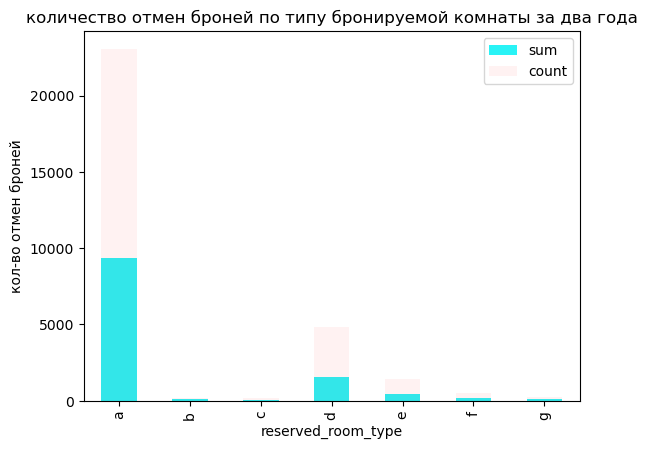

---------------------------------------------------------------


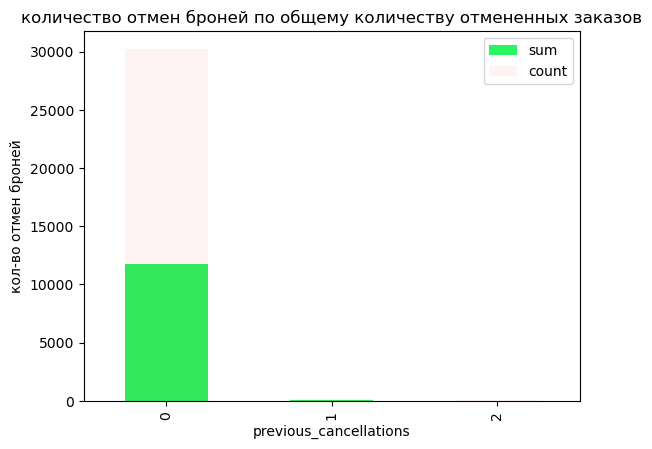

In [43]:
ax_s = train.pivot_table(values = 'is_canceled', index ='customer_type', 
                  aggfunc = ['sum'])
ax_c = train.pivot_table(values = 'is_canceled', index ='customer_type', 
                  aggfunc = ['count'])
ax_combined = pd.concat([ax_s, ax_c], axis=1)
ax_combined.columns = ['sum', 'count']
fig, ax = plt.subplots()

ax_combined.plot( y='sum', kind='bar', color='#EA9623', alpha=1,
                 xlabel='каналы', ylabel='тип заказчика',
                 title='количество отмен броней по типу заказчика за два года', ax=ax)

ax_combined.plot(y='count', kind='bar', color='red', alpha=0.05, ax=ax)

plt.show()
print('---------------------------------------------------------------')
ax_s = train.pivot_table(values = 'is_canceled', index ='distribution_channel', 
                  aggfunc = ['sum'])
ax_c = train.pivot_table(values = 'is_canceled', index ='distribution_channel', 
                  aggfunc = ['count'])
ax_combined = pd.concat([ax_s, ax_c], axis=1)
ax_combined.columns = ['sum', 'count']
fig, ax = plt.subplots()

ax_combined.plot( y='sum', kind='bar', color='#64C828', alpha=1,
                 xlabel='каналы', ylabel='кол-во отмен броней',
                 title='количество отмен броней по каналам дистрибуции за два года', ax=ax)

ax_combined.plot(y='count', kind='bar', color='red', alpha=0.05, ax=ax)

plt.show()
print('---------------------------------------------------------------')
ax_s = train.pivot_table(values = 'is_canceled', index ='reserved_room_type', 
                  aggfunc = ['sum'])
ax_c = train.pivot_table(values = 'is_canceled', index ='reserved_room_type', 
                  aggfunc = ['count'])
ax_combined = pd.concat([ax_s, ax_c], axis=1)
ax_combined.columns = ['sum', 'count']
fig, ax = plt.subplots()

ax_combined.plot( y='sum', kind='bar', color='#29F3F6', alpha=1,
                 xlabel='тип комнаты', ylabel='кол-во отмен броней',
                 title='количество отмен броней по типу бронируемой комнаты за два года', ax=ax)

ax_combined.plot(y='count', kind='bar', color='red', alpha=0.05, ax=ax)

plt.show()

print('---------------------------------------------------------------')
ax_s = train.pivot_table(values = 'is_canceled', index ='previous_cancellations', 
                  aggfunc = ['sum'])
ax_c = train.pivot_table(values = 'is_canceled', index ='previous_cancellations', 
                  aggfunc = ['count'])
ax_combined = pd.concat([ax_s, ax_c], axis=1)
ax_combined.columns = ['sum', 'count']
fig, ax = plt.subplots()

ax_combined.plot( y='sum', kind='bar', color='#29F65E', alpha=1,
                 xlabel='кол-во отмененных заказов', ylabel='кол-во отмен броней',
                 title='количество отмен броней по общему количеству отмененных заказов', ax=ax)

ax_combined.plot(y='count', kind='bar', color='red', alpha=0.05, ax=ax)

plt.show()

***Вывод:***

- Самые высокорискованные группы - transient и transient-party, то есть те, кто не связаны с договором или групповым заездом.

- По каналам дистрибуции чаще всего отказываются ta/to.

- По типу комнаты однозначно вывод сделать нельзя, дисбаланс слишком большой.

- Те, кто уже отменяли заказы несколько раз часто отменяют снова и в последующие разы.

### Шаг 6. Напишите общий вывод

***Общий вывод по всему проекту***

Главной задачей этого проекта было увеличение прибыли в счет уменьшения затрат. Вложения - ***400_000*** на создание системы депозитов окупили себя в несколько раз. За ***2017*** год, т.е. тестовый период система дала сохранить ***8_000_000*** прибыли. 

В ходе проделанной работы были очищены данные для лучшей обучаемости модели, подбор параметров модели, подбор самих моделей. 

На тестовой выборке удалось достичь точности в ***76%*** предсказаний отказов от бронирования, что, как я считаю, является хорошим показателем.

Был проведен исследовательский анализ данных, чтобы точнее определить нашего клиента, его поведение и предпочтения.

Был проведен подсчет прибыли и убытков за ***2015*** и ***2016*** год, которые показывали очень большие значения по убыткам. 

Был проведен посчет прибыли и убытков за ***2017*** год без внедрения системы депозитов и с внедрением. Который показал, что система помогла понизить убытки в ***2 раза***.

Результаты:
- убыток ***упал*** с 17_000_000 до 4_900_000
- прибыль ***выросла*** с 30_000_000 до 44_000_000

Также составлен ***примерный*** портрет "ненадежного" клиента.

- Относящиеся к группам - transient и transient-party, то есть те, кто не связаны с договором или групповым заездом.

- По каналам дистрибуции: ta/to.

- Те, кто уже отменяли заказы несколько раз часто отменяют снова и в последующие разы.

Внедрить систему депозитов рекомендуется на постоянной основе.